In [1]:
import mlflow
import pandas as pd

# Load preprocessed data
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test.csv')

# Load the trained model
model = mlflow.sklearn.load_model('iris_model')

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)

# Log the experiment
with mlflow.start_run() as run:
    mlflow.log_metric('accuracy', accuracy)


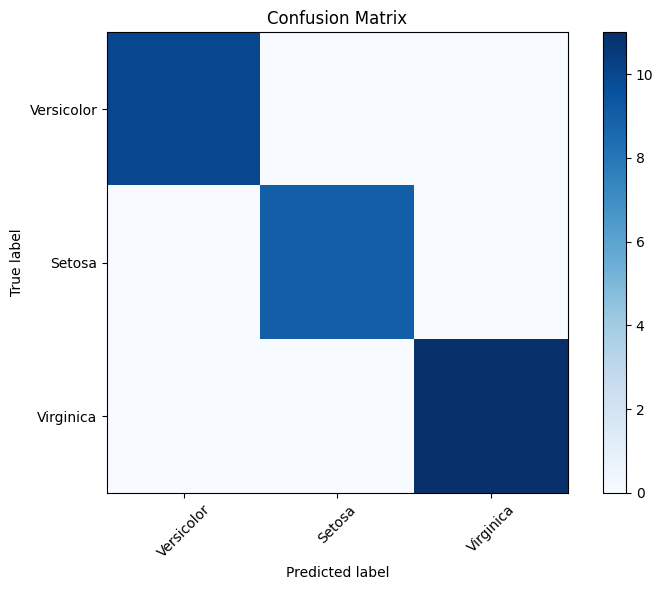

In [2]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load preprocessed data
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test.csv')

# Load the trained model
model = mlflow.sklearn.load_model('iris_model')

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)
classification_rep = classification_report(y_test, y_pred)

# Log the experiment
with mlflow.start_run() as run:
    mlflow.log_metric('accuracy', accuracy)
    
    # Log classification report as text
    mlflow.log_text(classification_rep, 'classification_report.txt')
    
    # Log confusion matrix as image
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(range(3), y_test['species'].unique(), rotation=45)
    plt.yticks(range(3), y_test['species'].unique())
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    # Save confusion matrix plot as an image
    confusion_matrix_path = 'confusion_matrix.png'
    plt.savefig(confusion_matrix_path)
    
    # Log the confusion matrix image as an artifact
    mlflow.log_artifact(confusion_matrix_path)
    
    # Log hyperparameters as parameters
    mlflow.log_param('n_estimators', 100)
    mlflow.log_param('random_state', 42)


In [5]:
import mlflow
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load preprocessed data
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test.csv')
X_train_scaled = pd.read_csv('X_train_scaled.csv')
y_train = pd.read_csv('y_train.csv')
# List of models to train
models = [
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=42)),
    ('SVM', SVC(kernel='linear', random_state=42)),
]

# Perform model training and comparison
for model_name, model in models:
    with mlflow.start_run(run_name=model_name) as run:
        model.fit(X_train_scaled, y_train)
        accuracy = model.score(X_test_scaled, y_test)
        y_pred = model.predict(X_test_scaled)
        classification_rep = classification_report(y_test, y_pred)

        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_param('n_estimators', 100)  # For RandomForest and GradientBoosting
        mlflow.log_param('max_iter', 1000)      # For LogisticRegression
        mlflow.log_param('kernel', 'linear')    # For SVM
        mlflow.log_param('random_state', 42)
        mlflow.log_text(classification_rep, 'classification_report.txt')

# Compare models using the MLflow UI
mlflow_ui_url = "http://127.0.0.1:5000"  # Replace with your MLflow UI URL
print(f"View the results in the MLflow UI: {mlflow_ui_url}")


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

View the results in the MLflow UI: http://127.0.0.1:5000
